Скачать список пользователей, состоящих в группе https://vk.com/dormitory8hse. Нарисовать столбчатую диаграмму, показывающую, сколько человек из каких городов состоит в группе.

In [18]:
import urllib.request
import json
offsets = [0, 1000, 2000, 3000, 4000, 5000, 6000]
users = set()
for off in offsets:
    req2 = urllib.request.Request('https://api.vk.com/method/groups.getMembers?group_id=dormitory8hse&v=5.92&access_token=8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8&offset=' + str(off))
    response2 = urllib.request.urlopen(req2)
    result2 = response2.read().decode('utf-8')
    data2 = json.loads(result2) 
    users = users | set(data2['response']['items'])
len(users)

5149

In [19]:
cities = []
i = 0
for user in users:
    if i > 1000:
        break
    req = urllib.request.Request('https://api.vk.com/method/users.get?v=5.92&access_token=8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8&user_ids={}&fields=home_town'.format(str(user)))
    response = urllib.request.urlopen(req) # да, так тоже можно, не обязательно делать это с with, как в примере выше
    result = response.read().decode('utf-8')
    data = json.loads(result) 
    if 'home_town' not in (data['response'][0]):
        continue
    cities.append(data['response'][0]['home_town'])
    i += 1
print(len(cities))

1001


In [20]:
cities = [city for city in cities if city != '']
from collections import Counter
cities = Counter(cities)

In [21]:
cities = dict(cities)
cities = {c : cities[c] for c in cities if cities[c] > 2 and len(c) > 2}

# сортируем словарь по значениям
sorted(cities.items(), key=lambda x: x[1], reverse=True)

[('Москва', 42),
 ('Ташкент', 18),
 ('Санкт-Петербург', 14),
 ('Новосибирск', 13),
 ('Чебоксары', 13),
 ('Ижевск', 10),
 ('Киров', 10),
 ('Челябинск', 10),
 ('Брянск', 9),
 ('Самара', 9),
 ('Воронеж', 9),
 ('Красноярск', 8),
 ('Саратов', 8),
 ('Пермь', 8),
 ('Екатеринбург', 8),
 ('Ростов-на-Дону', 7),
 ('Набережные Челны', 7),
 ('Тамбов', 6),
 ('Тольятти', 6),
 ('Казань', 6),
 ('Омск', 6),
 ('Тверь', 5),
 ('Уфа', 5),
 ('Нижний Новгород', 5),
 ('Тула', 5),
 ('Обнинск', 4),
 ('Калуга', 4),
 ('Караганда', 4),
 ('Тирасполь', 4),
 ('Коломна', 4),
 ('Сыктывкар', 4),
 ('Кишинев', 4),
 ('Волжский', 4),
 ('Ставрополь', 4),
 ('Бишкек', 4),
 ('Йошкар-Ола', 4),
 ('Ульяновск', 3),
 ('Иваново', 3),
 ('Павлодар', 3),
 ('Архангельск', 3),
 ('Белгород', 3),
 ('Вологда', 3),
 ('Смоленск', 3),
 ('Элиста', 3),
 ('Бугульма', 3),
 ('Курск', 3),
 ('Ереван', 3),
 ('Балаково', 3)]

No handles with labels found to put in legend.


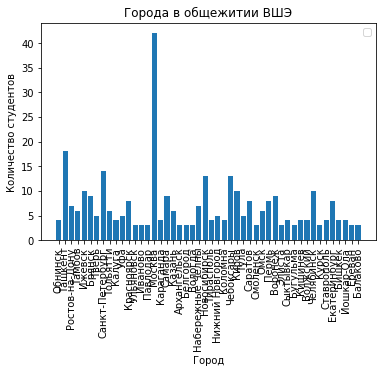

In [22]:
import matplotlib.pyplot as plt

city_nums = [cities[city] for city in cities]
city_labs = [city for city in cities]
plt.bar(range(len(city_labs)), city_nums)

plt.title('Города в общежитии ВШЭ')
plt.ylabel('Количество студентов')
plt.xlabel('Город')
plt.xticks(range(len(city_labs)), city_labs, rotation=90)
plt.legend()
plt.show()